In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('./data/data.xlsx', index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2023-04-24 00시,236,251,253,254,265,279,261,279,140,183
1,2023-04-24 01시,211,190,164,192,184,241,208,243,126,138
2,2023-04-24 02시,145,161,115,200,152,184,151,173,83,94
3,2023-04-24 03시,162,170,105,185,119,152,196,141,59,86
4,2023-04-24 04시,200,299,151,47,181,289,362,207,135,169


In [3]:
input_volumes = pd.read_excel('./data/input_volume.xlsx', index_col=0)
input_volumes

,0_0,0_2,1_3,2_2,3_2,3_1,4_1,4_2
0,295,491,158,254,208,232,300,252
1,216,437,103,226,189,141,185,220
2,195,314,93,197,147,128,187,147
3,205,352,68,256,204,119,258,143
4,482,520,161,438,313,335,747,205
...,...,...,...,...,...,...,...,...
115,1435,2103,738,1313,1133,1080,1249,1479
116,1129,1850,673,1168,897,857,1096,1256
117,989,1627,527,1051,750,830,893,1033
118,875,1407,438,843,628,628,775,818


In [4]:
train_eT = np.array(data.iloc[56,1:].values)
train_eT

array([1005, 1553, 1180, 1682, 1911, 1424, 1628, 1494, 1084, 1454],
      dtype=object)

In [5]:
train_input = input_volumes.iloc[56,:].values
train_input

array([1549, 2560, 1157, 2065, 1801, 1514, 1842, 1211], dtype=int64)

In [6]:
from BRL import p_matrix, I_matrix
from optimizer3 import solve

In [11]:
from hyperopt import hp, fmin, tpe, Trials
def objective(args):
    w2, w3, w5, w6, w8, w9 = args
    solution = solve(e_T=train_eT, w2=int(w2), w3=int(w3), w5=int(w5), w6=int(w6), w8=int(w8), w9=int(w9), lambda2=5, input_volume=train_input, max_time=5)
    if bool(solution): # 해가 존재
        x = np.zeros(66)
        for i in solution:
            x[i] = solution[i]
        e = p_matrix @ x
        diff = np.linalg.norm(train_eT - e)
        return diff
    else: # 해가 존재하지 않음
        return np.Inf

space = [
    hp.quniform('w2', 1, 999, 1),
    hp.quniform('w3', 1, 999, 1),
    hp.quniform('w5', 1, 999, 1),
    hp.quniform('w6', 1, 999, 1),
    hp.quniform('w8', 1, 999, 1),
    hp.quniform('w9', 1, 999, 1),
]

results = []
for i in range(50):
    try:
        trials = Trials()
        result = fmin(
            fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10
        )
        
        results.append(result)
    except Exception as e:
        print(f"Iteration {i}: 에러가 발생했습니다. 다음 반복으로 이동합니다. 오류 내용: {e}")

100%|██████████| 10/10 [00:51<00:00,  5.13s/trial, best loss: 508.98821204424763]


In [13]:
results

[{'w2': 653.0,
  'w3': 575.0,
  'w5': 628.0,
  'w6': 478.0,
  'w8': 480.0,
  'w9': 254.0},
 {'w2': 369.0, 'w3': 88.0, 'w5': 420.0, 'w6': 83.0, 'w8': 141.0, 'w9': 27.0},
 {'w2': 602.0,
  'w3': 528.0,
  'w5': 514.0,
  'w6': 369.0,
  'w8': 520.0,
  'w9': 332.0},
 {'w2': 610.0,
  'w3': 145.0,
  'w5': 979.0,
  'w6': 433.0,
  'w8': 321.0,
  'w9': 527.0},
 {'w2': 551.0, 'w3': 60.0, 'w5': 292.0, 'w6': 346.0, 'w8': 353.0, 'w9': 387.0},
 {'w2': 874.0, 'w3': 390.0, 'w5': 587.0, 'w6': 503.0, 'w8': 676.0, 'w9': 95.0},
 {'w2': 452.0, 'w3': 268.0, 'w5': 393.0, 'w6': 99.0, 'w8': 970.0, 'w9': 583.0},
 {'w2': 819.0, 'w3': 662.0, 'w5': 795.0, 'w6': 82.0, 'w8': 3.0, 'w9': 228.0},
 {'w2': 841.0, 'w3': 411.0, 'w5': 701.0, 'w6': 958.0, 'w8': 728.0, 'w9': 38.0},
 {'w2': 464.0, 'w3': 94.0, 'w5': 752.0, 'w6': 943.0, 'w8': 815.0, 'w9': 283.0},
 {'w2': 740.0, 'w3': 45.0, 'w5': 561.0, 'w6': 724.0, 'w8': 527.0, 'w9': 4.0},
 {'w2': 906.0,
  'w3': 199.0,
  'w5': 220.0,
  'w6': 693.0,
  'w8': 601.0,
  'w9': 299.0},
 {

In [14]:
errors = []
for result in results:
    solution = solve(e_T=train_eT, w2=int(result['w2']), w3=int(result['w3']), w5=int(result['w5']),\
        w6=int(result['w6']), w8=int(result['w8']), w9=int(result['w9']), lambda2=5, max_time=5)
    x = np.zeros(66)
    for i in solution:
        x[i] = solution[i]
    e = p_matrix @ x
    errors.append(np.linalg.norm(train_eT - e))

In [15]:
errors

[533.0309559490893,
 548.5754278128031,
 533.1247508791915,
 520.1653583236777,
 528.3616185909041,
 533.4182224108959,
 533.1144342446563,
 474.15609244214085,
 518.2238898391312,
 561.959073242883,
 528.9158723275375,
 531.3727505245258,
 537.5592990545322,
 538.9146500142671,
 533.2429090011418,
 468.05234749972146,
 485.18450098905674,
 548.6127960592971,
 544.9357760323688,
 532.1409587693847,
 460.40851425663277,
 565.5934935976545,
 540.7272880112488,
 529.9198052535874,
 546.1593174157152,
 533.579422391831,
 541.7434817328216,
 486.62202991644347,
 515.6171060001792,
 532.981237943701,
 432.64188424145897,
 540.722664588789,
 560.3668441298075,
 523.8148527867456,
 484.85977354282545,
 573.9729958804683,
 546.5253882483411,
 560.0776731847111,
 535.4997665732451,
 536.2396852154827,
 530.306515140065,
 523.8749850870912,
 432.40490283991926,
 568.5692569951351,
 346.96685720685196,
 488.69008584173264,
 530.6486596609851,
 544.6457564325642,
 633.0110583552233,
 547.5664343255

In [19]:
import pickle
with open('errors.pickle', 'wb') as f:
    pickle.dump(errors, f)

In [24]:
outliers = [i for i in errors if i > 160]
for outlier in outliers:
    print(f"Error : {outlier}, Parameter : {results[errors.index(outlier)]}")

Error : 187.74450724322136, Parameter : {'lambda2': 0, 'w2': 650.0, 'w3': 727.0, 'w5': 852.0, 'w6': 810.0, 'w8': 703.0, 'w9': 568.0}
Error : 197.06344156134085, Parameter : {'lambda2': 0, 'w2': 218.0, 'w3': 812.0, 'w5': 399.0, 'w6': 929.0, 'w8': 507.0, 'w9': 692.0}
Error : 171.37969541342989, Parameter : {'lambda2': 0, 'w2': 463.0, 'w3': 930.0, 'w5': 868.0, 'w6': 144.0, 'w8': 646.0, 'w9': 571.0}
Error : 182.2333668678708, Parameter : {'lambda2': 0, 'w2': 319.0, 'w3': 754.0, 'w5': 664.0, 'w6': 863.0, 'w8': 927.0, 'w9': 632.0}
Error : 171.9447585708852, Parameter : {'lambda2': 0, 'w2': 328.0, 'w3': 895.0, 'w5': 491.0, 'w6': 261.0, 'w8': 58.0, 'w9': 399.0}


In [16]:
errors.index(min(errors))

44

In [17]:
print(errors[44], results[44])

346.96685720685196 {'w2': 850.0, 'w3': 599.0, 'w5': 687.0, 'w6': 249.0, 'w8': 377.0, 'w9': 807.0}


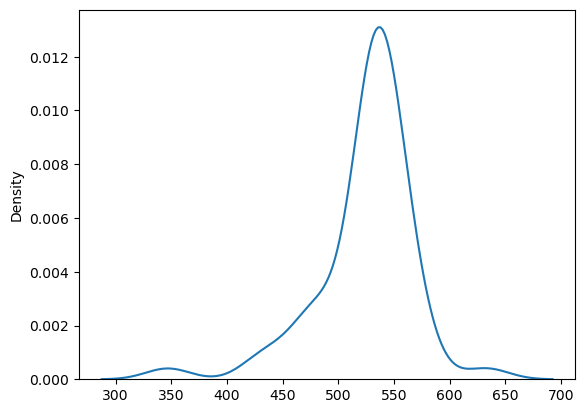

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(errors)
plt.show()

In [ ]:
solution = solve(e_T=train_eT, w2=824, w3=159, w5=362, w6=95, w8=364, w9=63, lambda2=1)
x = np.zeros(66)
for i in solution:
    x[i] = solution[i]
e = p_matrix@x
print(e)
print(train_eT)
print(np.linalg.norm(train_eT-e))

[1745. 1677. 1657. 1582. 1657. 1583. 1715. 1520. 1228. 1252.]
[1005 1553 1180 1682 1911 1424 1628 1494 1084 1454]
979.8402931090352


In [ ]:
I_matrix@x

array([   0., 1745., 1167.,    0., 1796., 1501., 1582., 1166.])